In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [3]:
from sklearn.datasets import load_iris

In [7]:
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

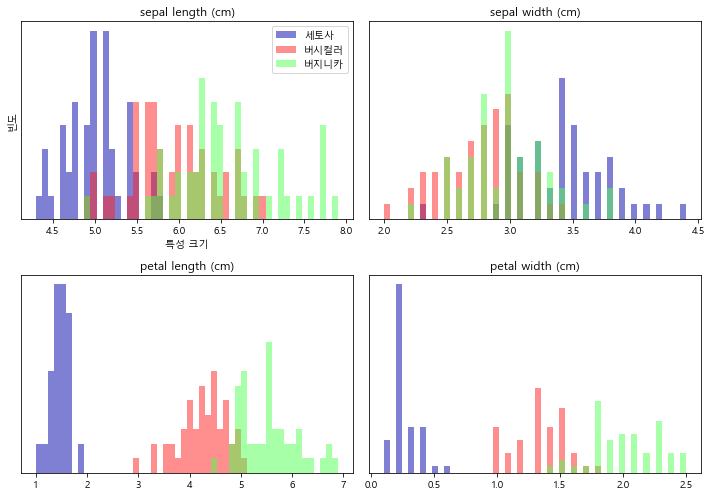

In [18]:
from sklearn.model_selection import train_test_split
import mglearn

fig, axes = plt.subplots(2, 2, figsize=(10, 7))
setosa = iris.data[iris.target == 0]
versicolor = iris.data[iris.target == 1]
virginica = iris.data[iris.target == 2]

ax = axes.ravel()

for i in range(4):
    _, bins = np.histogram(iris.data[:, i], bins=50)
    ax[i].hist(setosa[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(versicolor[:, i], bins=bins, color=mglearn.cm3(1), alpha=.5)
    ax[i].hist(virginica[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(iris.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["세토사", "버시컬러","버지니카"], loc="best")
fig.tight_layout()

In [20]:
from sklearn.preprocessing import StandardScaler
# StandardScaler를 사용 각 특성의 분산이 1이 되도록 스케일 조정
scaler = StandardScaler()
scaler.fit(iris.data)
X_scaled = scaler.transform(iris.data)
X_scaled.shape

(150, 4)

In [32]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지시킵니다
pca = PCA(n_components=2) # PCA 내부적으로 분산이 넓게 분포된 자료를 선택하여 2개의 컴포넌트를 선택함.
pca.fit(X_scaled)
# 처음 두 개의 주성분을 사용해 데이터를 변환합니다
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (150, 4)
축소된 데이터 형태: (150, 2)


Text(0, 0.5, '두 번째 주성분')

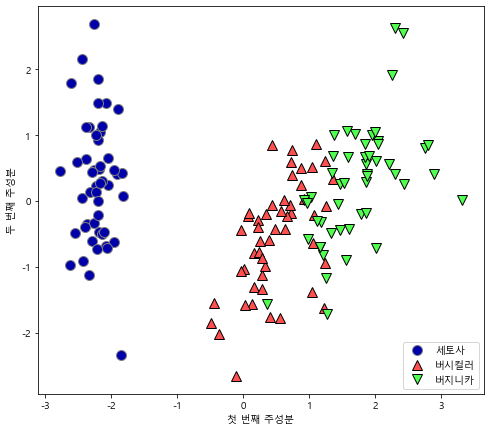

In [33]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], iris.target)
plt.legend(["세토사", "버시컬러","버지니카"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [34]:
print("PCA 주성분 형태:", pca.components_.shape)

PCA 주성분 형태: (2, 4)


In [35]:
print("PCA 주성분:", pca.components_)
# "components_"에 pca 분석 값이 저장됨.

PCA 주성분: [[ 0.521 -0.269  0.58   0.565]
 [ 0.377  0.923  0.024  0.067]]


Text(0, 0.5, '주성분')

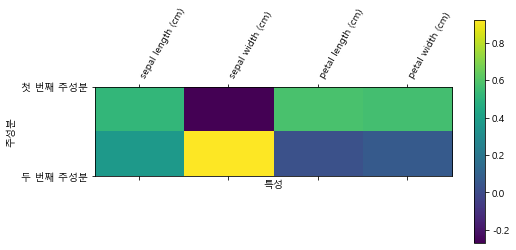

In [36]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(iris.feature_names)),
           iris.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")